<a href="https://colab.research.google.com/github/kiran2706/NLP_setimental/blob/main/Bad_or_Good_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Install Libraries**

In [ ]:
# for collecting the html
! pip3 install requests


# for scrapping the table
! pip3 install html-table-parser-python3

# for scrapping from each html
! pip3 install beautifulsoup4

# for EDA and Prediction
! pip install pandas-profiling==2.8.0  -q
! pip install pycaret[full] --q

     |████████████████████████████████| 266kB 9.1MB/s 
     |████████████████████████████████| 1.1MB 54.0MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 3.1MB 52.6MB/s 
     |████████████████████████████████| 61kB 10.8MB/s 
     |████████████████████████████████| 296kB 47.8MB/s 
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
     |████████████████████████████████| 266kB 10.0MB/s 
     |████████████████████████████████| 1.4MB 34.3MB/s 
     |████████████████████████████████| 174kB 43.8MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 2.0MB 54.3MB/s 
     |████████████████████████████████| 112kB 57.5MB/s 
     |████████████████████████████████| 1.7MB 49.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |█

## libraries

In [ ]:
# libraries for scrapping
import urllib.request as request
from html_table_parser import HTMLTableParser
import requests
from bs4 import BeautifulSoup

# Data Analysis
import pandas as pd
import numpy as np
import re


# for Eda and visualization
import pandas_profiling
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# for analytics and Prediction
# from sklearn import set_config as sg
# sg(display="diagram")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer



from pycaret.classification import get_config,setup
from pycaret.classification import compare_models,create_model,tune_model,finalize_model,save_model,predict_model,load_model,get_config,plot_model
from pycaret.classification import remove_metric

# metrics for validating test data
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,mean_squared_error,f1_score


# for NLP
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **2.Scrapping**

### Scrapper Class and methods

In [ ]:
# function for getting numbers from text

def getNumbers(str):
    """ library re is used """

    array = re.findall(r'[0-9]+', str)
    return array

# Scrapping the hyperlink numbers from website 

def link_num(text,pattern):
    try:
      if pattern in text:
        return (getNumbers(text))
    except Exception:
      pass

# scrapper class

class Scrapper():
    """ for scrapping table, links, test"""


    def __init__(self,url):
      self.url = url


    def connect_page(self):
      page = requests.get(self.url)
      self.soup = BeautifulSoup(page.content, 'html.parser')

    def scrap_div(self,c_lass):
      scraped = self.soup.find_all('div', class_ = c_lass)
      return scraped


    def links(self):
      links = []
      for link in self.soup.findAll('a'):
        links.append(link.get('href'))
      return links



    def url_get_contents(self):
        """ Opens a website and read its binary contents (HTTP Response Body) """
        req = request.Request(self.url)
        f = request.urlopen(req)
        xhtml = f.read().decode('utf-8')
        self.p = HTMLTableParser()
        self.p.feed(xhtml)

    def to_table(self,table_index,column_names=None):
        if column_names:
            dataframe = pd.DataFrame(self.p.tables[table_index],columns=column_names)
            return dataframe
        else:
            return pd.DataFrame(self.p.tables[table_index])

### test

In [ ]:
# url = 'https://www.consumeraffairs.com/online/amazon.html?page=4#sort=top_reviews&filter=none'
# b = Scrapper(url=url)
# b.connect_page()
# scrapped = b.scrap_div('rvw js-rvw')

In [ ]:
# for i in range(1,len(scrapped)):
#     review = scrapped[i]
#     reviews.append(review.p.string)

In [ ]:
# review = scrapped[19]

In [ ]:
# review.p.string

'After calling and being told of my package being delayed till after March 06, 2021 and being VERY upset due to paying monthly for Prime Membership, the package strangely came from San Antonio Texas to me (in my city living in) before 12pm. So, it does PAY to complain, let them know you will post a review of bad services and demand to receive what one pays for. So, I think I should not have been put through this all, but yet I DID receive my packages. And, THANK You!'

### Scrapping the reviews and ratings

In [ ]:
reviews = []
ratings = []
 
# url is passed to the class Scrapper and scrapping the review and ratings from website


for i in range(4,240):
  url = f'https://www.consumeraffairs.com/online/amazon.html?page={i}#sort=top_reviews&filter=none'
  b = Scrapper(url=url)
  b.connect_page()
  scrapped = b.scrap_div('rvw js-rvw')
  for i in range(1,len(scrapped)):
    review = scrapped[i]
    if review.p is not None:
      reviews.append(review.p.string)
      if review.div.div is not None:
        if review.div.div.img is not None:
          ratings.append(review.div.div.img.get('data-rating'))
        else:
          ratings.append(review.div.div.div.get('data-rating'))
      else:
        ratings.append(np.nan)

https://www.consumeraffairs.com/online/amazon.html?page=72#sort=top_reviews&filter=none
29
1.0
Amazon could care less whether their delivery people delivery to the correct address. Their delivery people leave packages at my house because they are too lazy to find the right address. Time wasted.


In [ ]:
df_org = pd.DataFrame(None,columns=['Review','Rating'])

df_org['Review'] = reviews
df_org['Rating'] = ratings

In [ ]:
df = df_org.copy(deep=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
# create the label
df["Is_bad_review"] = df['Rating'].apply(lambda x: 1 if float(x) < 2 else 0)

## to download the dataframe

In [ ]:
from google.colab import files
df.to_csv('Data_amazon_review_rating.csv')
files.download('Data_amazon_review_rating.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **3. PreProcessing the df**

In [ ]:
df_org = pd.read_csv('/content/drive/MyDrive/projects/revire_bad_or_not/Data_amazon_review_rating.csv')

In [ ]:
df_org.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df = df_org.copy(deep=True)

In [ ]:
df['Rating'].value_counts()

1.0    3955
5.0    1535
2.0     380
4.0     364
3.0     167
Name: Rating, dtype: int64

In [ ]:
df['Is_bad_review'].value_counts()

1    3955
0    2446
Name: Is_bad_review, dtype: int64

In [ ]:
df = df.loc[:,['Review','Is_bad_review']]

In [ ]:
df.isnull().sum()

Review           0
Is_bad_review    0
dtype: int64

In [ ]:
df.shape

(6401, 2)

In [ ]:
df_org.iloc[511]

Review           Amazon is really a go to for everything. It's ...
Rating                                                           5
Is_bad_review                                                    0
Name: 511, dtype: object

In [ ]:
df_org.iloc[1330]

Review           Bought a queen size adjustable bed. Received a...
Rating                                                           1
Is_bad_review                                                    1
Name: 1330, dtype: object

In [ ]:
df_org.head(20)

,Review,Rating,Is_bad_review
0,In two weeks they lost 2 of the same packages....,1.0,1
1,Amazon is terrible when it comes to something ...,1.0,1
2,I bought so many in a Amazon app good products...,5.0,0
3,All CS are train unprofessional. They aren't h...,1.0,1
4,Amazon IS THE MOST HORRIBLE WEBSITE TO ORDER O...,1.0,1
5,Deceptive Marketing Practice. I complainant Ju...,1.0,1
6,"I recently moved into an area of quadplexes, e...",1.0,1
7,I think all they have now in chat for customer...,1.0,1
8,Wednesday I ordered a fire 10 and two mouse tr...,1.0,1
9,Recently I have ordered one product but that w...,1.0,1


# **4. NLP**

In [ ]:
df['Review'][0]

"In two weeks they lost 2 of the same packages.. They don't care. They are liars and deceivers. They mislead their customers. They lie about the delivery dates, they are incompetent. Steaming hot garbage full of manipulating pieces of trash. Don't use Amazon! Liars, cheaters, and thieves."

## **Transforming the text**

In [ ]:
# function for tagging the words in text

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

###  Each Steps



In [ ]:
tex = df['Review'][0]

In [ ]:
# 1st step
# lowering

tex = tex.lower()
tex

"in two weeks they lost 2 of the same packages.. they don't care. they are liars and deceivers. they mislead their customers. they lie about the delivery dates, they are incompetent. steaming hot garbage full of manipulating pieces of trash. don't use amazon! liars, cheaters, and thieves."

In [ ]:
# 2nd step
# remove NonAscii characters
tex = "".join(word for word in tex if  ord(word)<128)
print(tex)

in two weeks they lost 2 of the same packages.. they don't care. they are liars and deceivers. they mislead their customers. they lie about the delivery dates, they are incompetent. steaming hot garbage full of manipulating pieces of trash. don't use amazon! liars, cheaters, and thieves.


In [ ]:
# 3rd step
# remove the punctuations
for i in string.punctuation:
   tex = tex.split(i)
   tex = " ".join(tex)
print(tex)

in two weeks they lost 2 of the same packages   they don t care  they are liars and deceivers  they mislead their customers  they lie about the delivery dates  they are incompetent  steaming hot garbage full of manipulating pieces of trash  don t use amazon  liars  cheaters  and thieves 


In [ ]:
# 4th step
#  tokenize the words or split the words
tex = tex.split()
print(tex)

['in', 'two', 'weeks', 'they', 'lost', '2', 'of', 'the', 'same', 'packages', 'they', 'don', 't', 'care', 'they', 'are', 'liars', 'and', 'deceivers', 'they', 'mislead', 'their', 'customers', 'they', 'lie', 'about', 'the', 'delivery', 'dates', 'they', 'are', 'incompetent', 'steaming', 'hot', 'garbage', 'full', 'of', 'manipulating', 'pieces', 'of', 'trash', 'don', 't', 'use', 'amazon', 'liars', 'cheaters', 'and', 'thieves']


In [ ]:
# 5th step 
# remove words that conatins numbers

tex = [token for token in tex if not any(i.isdigit() for i in token)]
print(tex)

['in', 'two', 'weeks', 'they', 'lost', 'of', 'the', 'same', 'packages', 'they', 'don', 't', 'care', 'they', 'are', 'liars', 'and', 'deceivers', 'they', 'mislead', 'their', 'customers', 'they', 'lie', 'about', 'the', 'delivery', 'dates', 'they', 'are', 'incompetent', 'steaming', 'hot', 'garbage', 'full', 'of', 'manipulating', 'pieces', 'of', 'trash', 'don', 't', 'use', 'amazon', 'liars', 'cheaters', 'and', 'thieves']


In [ ]:
# 6th step
# remove stop words

tex = [token for token in tex if token not in [stopwords.words('english')]]
print(tex)

['in', 'two', 'weeks', 'they', 'lost', 'of', 'the', 'same', 'packages', 'they', 'don', 't', 'care', 'they', 'are', 'liars', 'and', 'deceivers', 'they', 'mislead', 'their', 'customers', 'they', 'lie', 'about', 'the', 'delivery', 'dates', 'they', 'are', 'incompetent', 'steaming', 'hot', 'garbage', 'full', 'of', 'manipulating', 'pieces', 'of', 'trash', 'don', 't', 'use', 'amazon', 'liars', 'cheaters', 'and', 'thieves']


In [ ]:
# 7th remove empty tokens
tex = [t for t in tex if len(t) > 1]
print(tex)

['in', 'two', 'weeks', 'they', 'lost', 'of', 'the', 'same', 'packages', 'they', 'don', 'care', 'they', 'are', 'liars', 'and', 'deceivers', 'they', 'mislead', 'their', 'customers', 'they', 'lie', 'about', 'the', 'delivery', 'dates', 'they', 'are', 'incompetent', 'steaming', 'hot', 'garbage', 'full', 'of', 'manipulating', 'pieces', 'of', 'trash', 'don', 'use', 'amazon', 'liars', 'cheaters', 'and', 'thieves']


In [ ]:
# 8th step
pos_tags = pos_tag(tex)
pos_tags

[('in', 'IN'),
 ('two', 'CD'),
 ('weeks', 'NNS'),
 ('they', 'PRP'),
 ('lost', 'VBD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('packages', 'NNS'),
 ('they', 'PRP'),
 ('don', 'VBP'),
 ('care', 'NN'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('liars', 'NNS'),
 ('and', 'CC'),
 ('deceivers', 'NNS'),
 ('they', 'PRP'),
 ('mislead', 'VBP'),
 ('their', 'PRP$'),
 ('customers', 'NNS'),
 ('they', 'PRP'),
 ('lie', 'VBP'),
 ('about', 'IN'),
 ('the', 'DT'),
 ('delivery', 'NN'),
 ('dates', 'VBZ'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('incompetent', 'JJ'),
 ('steaming', 'VBG'),
 ('hot', 'JJ'),
 ('garbage', 'NN'),
 ('full', 'JJ'),
 ('of', 'IN'),
 ('manipulating', 'VBG'),
 ('pieces', 'NNS'),
 ('of', 'IN'),
 ('trash', 'NN'),
 ('don', 'NN'),
 ('use', 'NN'),
 ('amazon', 'JJ'),
 ('liars', 'NNS'),
 ('cheaters', 'NNS'),
 ('and', 'CC'),
 ('thieves', 'NNS')]

In [ ]:
# 9th step
# lemmatize text
text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
text

['in',
 'two',
 'week',
 'they',
 'lose',
 'of',
 'the',
 'same',
 'package',
 'they',
 'don',
 'care',
 'they',
 'be',
 'liar',
 'and',
 'deceiver',
 'they',
 'mislead',
 'their',
 'customer',
 'they',
 'lie',
 'about',
 'the',
 'delivery',
 'date',
 'they',
 'be',
 'incompetent',
 'steam',
 'hot',
 'garbage',
 'full',
 'of',
 'manipulate',
 'piece',
 'of',
 'trash',
 'don',
 'use',
 'amazon',
 'liar',
 'cheater',
 'and',
 'thief']

In [ ]:
# 10th step
# remove words with only one letter

text = [t for t in text if len(t) > 1]

# join all
text = " ".join(text)
text

'in two week they lose of the same package they don care they be liar and deceiver they mislead their customer they lie about the delivery date they be incompetent steam hot garbage full of manipulate piece of trash don use amazon liar cheater and thief'

In [ ]:
df['Review'][0]


"In two weeks they lost 2 of the same packages.. They don't care. They are liars and deceivers. They mislead their customers. They lie about the delivery dates, they are incompetent. Steaming hot garbage full of manipulating pieces of trash. Don't use Amazon! Liars, cheaters, and thieves."

###  Whole columns


In [ ]:
def clean_text(text):
    # lower text
    text = text.lower()
    # remove NonAscii characters
    text = "".join(word for word in text if  ord(word)<128)
    # remove puncutation and tokenize 
    for i in string.punctuation:
      text = text.split(i)
      text = " ".join(text)
    text = text.split()
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [ ]:
# clean text in whole columns
df['Review_clean'] = df['Review'].apply(lambda x: clean_text(x))

In [ ]:
df_org['Review'][0]

"In two weeks they lost 2 of the same packages.. They don't care. They are liars and deceivers. They mislead their customers. They lie about the delivery dates, they are incompetent. Steaming hot garbage full of manipulating pieces of trash. Don't use Amazon! Liars, cheaters, and thieves."

In [ ]:
df['Review_clean'][0]

'two week lose package care liars deceiver mislead customer lie delivery date incompetent steam hot garbage full manipulating piece trash use amazon liars cheater thief'

In [ ]:
df.head(5)

,Review,Is_bad_review,Review_clean
0,In two weeks they lost 2 of the same packages....,1,two week lose package care liars deceiver misl...
1,Amazon is terrible when it comes to something ...,1,amazon terrible come something wrong item seco...
2,I bought so many in a Amazon app good products...,0,buy many amazon app good product delivery fast...
3,All CS are train unprofessional. They aren't h...,1,train unprofessional help long story short get...
4,Amazon IS THE MOST HORRIBLE WEBSITE TO ORDER O...,1,amazon horrible website order business stay aw...


# **5. Feature engineering**

We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt using the amazon website/app. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:
- a neutrality score
- a positivity score
- a negativity score
- an overall score that summarizes the previous scores

We will integrate those 4 values as features in our dataset.

In [ ]:
# add sentiment anaylsis columns


sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Review"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
print(df.shape)
df.head(5)

(6401, 7)


,Review,Is_bad_review,Review_clean,neg,neu,pos,compound
0,In two weeks they lost 2 of the same packages....,1,two week lose package care liars deceiver misl...,0.355,0.600,0.045,-0.9529
1,Amazon is terrible when it comes to something ...,1,amazon terrible come something wrong item seco...,0.059,0.873,0.068,-0.3182
2,I bought so many in a Amazon app good products...,0,buy many amazon app good product delivery fast...,0.046,0.643,0.311,0.9150
3,All CS are train unprofessional. They aren't h...,1,train unprofessional help long story short get...,0.145,0.833,0.022,-0.8501
4,Amazon IS THE MOST HORRIBLE WEBSITE TO ORDER O...,1,amazon horrible website order business stay aw...,0.145,0.834,0.021,-0.9019


Next, we add some simple metrics for every text:
- number of characters in the text
- number of words in the text

In [ ]:
# add number of characters column
df["nb_chars"] = df["Review"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["Review"].apply(lambda x: len(x.split(" ")))
print(df.shape)
df.head(5)

(6401, 9)


,Review,Is_bad_review,Review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,In two weeks they lost 2 of the same packages....,1,two week lose package care liars deceiver misl...,0.355,0.600,0.045,-0.9529,288,47
1,Amazon is terrible when it comes to something ...,1,amazon terrible come something wrong item seco...,0.059,0.873,0.068,-0.3182,958,180
2,I bought so many in a Amazon app good products...,0,buy many amazon app good product delivery fast...,0.046,0.643,0.311,0.9150,207,40
3,All CS are train unprofessional. They aren't h...,1,train unprofessional help long story short get...,0.145,0.833,0.022,-0.8501,380,76
4,Amazon IS THE MOST HORRIBLE WEBSITE TO ORDER O...,1,amazon horrible website order business stay aw...,0.145,0.834,0.021,-0.9019,427,76


The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [ ]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["Review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)
print(df.shape)
df.head(5)

(6401, 14)


,Review,Is_bad_review,Review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,In two weeks they lost 2 of the same packages....,1,two week lose package care liars deceiver misl...,0.355,0.600,0.045,-0.9529,288,47,-0.030000,0.001310,-0.429498,-0.054714,-0.148398
1,Amazon is terrible when it comes to something ...,1,amazon terrible come something wrong item seco...,0.059,0.873,0.068,-0.3182,958,180,-0.071998,-0.165990,-0.331045,-0.161148,-0.116199
2,I bought so many in a Amazon app good products...,0,buy many amazon app good product delivery fast...,0.046,0.643,0.311,0.9150,207,40,0.087573,0.054837,-0.004730,0.350469,-0.042220
3,All CS are train unprofessional. They aren't h...,1,train unprofessional help long story short get...,0.145,0.833,0.022,-0.8501,380,76,-0.078476,-0.301028,-0.152458,-0.086295,-0.039222
4,Amazon IS THE MOST HORRIBLE WEBSITE TO ORDER O...,1,amazon horrible website order business stay aw...,0.145,0.834,0.021,-0.9019,427,76,0.131975,0.012258,-0.285163,-0.142363,-0.151996


**TF-IDF**

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document. 

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:
- TF computes the classic number of times the word appears in the text
- IDF computes the relative importance of this word which depends on how many texts the word can be found
TfidfVectorizer - TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. It transforms text to feature vectors that can be used as input to estimator.Output of TfidfVectorizer is a sparse matrix.

The product of the TF and IDF scores of a word is called the TFIDF weight of that word. The higher the TFIDF score (weight), the rarer the word and vice versa.
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [ ]:
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=2000)

In [ ]:
# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df = 10,stop_words='english')

# Construct the required TF-IDF matrix by fitting and transforming the data to array
tfidf_matrix = tfidf.fit_transform(df["Review_clean"]).toarray()

tfidf_matrix = tsvd.fit_transform(tfidf_matrix)

# create a dataframe with the resultant matrix
tfidf_df = pd.DataFrame(tfidf_matrix,columns=["word_"+f'{i}' for i in range(1,2001)])
tfidf_df.index = df.index

# adding new column to the existing dataframe
df = pd.concat([df, tfidf_df], axis=1)
print(df.shape)
df.head(3)

(6401, 2014)


,Review,Is_bad_review,Review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,word_20,word_21,word_22,word_23,word_24,word_25,word_26,word_27,word_28,word_29,word_30,word_31,word_32,word_33,word_34,word_35,word_36,word_37,word_38,word_39,word_40,word_41,word_42,word_43,word_44,word_45,word_46,word_47,word_48,word_49,word_50,word_51,word_52,word_53,word_54,word_55,word_56,word_57,word_58,word_59,word_60,word_61,word_62,word_63,word_64,word_65,word_66,word_67,word_68,word_69,word_70,word_71,word_72,word_73,word_74,word_75,word_76,word_77,word_78,word_79,word_80,word_81,word_82,word_83,word_84,word_85,word_86,word_87,word_88,word_89,word_90,word_91,word_92,word_93,word_94,word_95,word_96,word_97,word_98,word_99,word_100,word_101,word_102,word_103,word_104,word_105,word_106,word_107,word_108,word_109,word_110,word_111,word_112,word_113,word_114,word_115,word_116,word_117,word_118,word_119,word_120,word_121,word_122,word_123,word_124,word_125,word_126,word_127,word_128,word_129,word_130,word_131,word_132,word_133,word_134,word_135,word_136,word_137,word_138,word_139,word_140,word_141,word_142,word_143,word_144,word_145,word_146,word_147,word_148,word_149,word_150,word_151,word_152,word_153,word_154,word_155,word_156,word_157,word_158,word_159,word_160,word_161,word_162,word_163,word_164,word_165,word_166,word_167,word_168,word_169,word_170,word_171,word_172,word_173,word_174,word_175,word_176,word_177,word_178,word_179,word_180,word_181,word_182,word_183,word_184,word_185,word_186,word_187,word_188,word_189,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,word_200,word_201,word_202,word_203,word_204,word_205,word_206,word_207,word_208,word_209,word_210,word_211,word_212,word_213,word_214,word_215,word_216,word_217,word_218,word_219,word_220,word_221,word_222,word_223,word_224,word_225,word_226,word_227,word_228,word_229,word_230,word_231,word_232,word_233,word_234,word_235,word_236,...,word_1751,word_1752,word_1753,word_1754,word_1755,word_1756,word_1757,word_1758,word_1759,word_1760,word_1761,word_1762,word_1763,word_1764,word_1765,word_1766,word_1767,word_1768,word_1769,word_1770,word_1771,word_1772,word_1773,word_1774,word_1775,word_1776,word_1777,word_1778,word_1779,word_1780,word_1781,word_1782,word_1783,word_1784,word_1785,word_1786,word_1787,word_1788,word_1789,word_1790,word_1791,word_1792,word_1793,word_1794,word_1795,word_1796,word_1797,word_1798,word_1799,word_1800,word_1801,word_1802,word_1803,word_1804,word_1805,word_1806,word_1807,word_1808,word_1809,word_1810,word_1811,word_1812,word_1813,word_1814,word_1815,word_1816,word_1817,word_1818,word_1819,word_1820,word_1821,word_1822,word_1823,word_1824,word_1825,word_1826,word_1827,word_1828,word_1829,word_1830,word_1831,word_1832,word_1833,word_1834,word_1835,word_1836,word_1837,word_1838,word_1839,word_1840,word_1841,word_1842,word_1843,word_1844,word_1845,word_1846,word_1847,word_1848,word_1849,word_1850,word_1851,word_1852,word_1853,word_1854,word_1855,word_1856,word_1857,word_1858,word_1859,word_1860,word_1861,word_1862,word_1863,word_1864,word_1865,word_1866,word_1867,word_1868,word_1869,word_1870,word_1871,word_1872,word_1873,word_1874,word_1875,word_1876,word_1877,word_1878,word_1879,word_1880,word_1881,word_1882,word_1883,word_1884,word_1885,word_1886,word_1887,word_1888,word_1889,word_1890,word_1891,word_1892,word_1893,word_1894,word_1895,word_1896,word_1897,word_1898,word_1899,word_1900,word_1901,word_1902,word_1903,word_1904,word_1905,word_1906,word_1907,word_1908,word_1909,word_1910,word_1911,word_1912,word_1913,word_1914,word_1915,word_1916,word_1917,word_1918,word_1919,word_1920,word_1921,word_1922,word_1923,word_1924,word_1925,word_1926,word_1927,word_1928,word_1929,word_1930,word_1931,word_1932,w

# **6. Exploratory data analysis**


In order to have a better understanding of our data, let's explore it a little:

In [ ]:
# show is_bad_review distribution
df["Is_bad_review"].value_counts(normalize = True)

1    0.617872
0    0.382128
Name: Is_bad_review, dtype: float64

Now let's print some wordclouds to have a glimpse at what kind of words apear in our reviews:

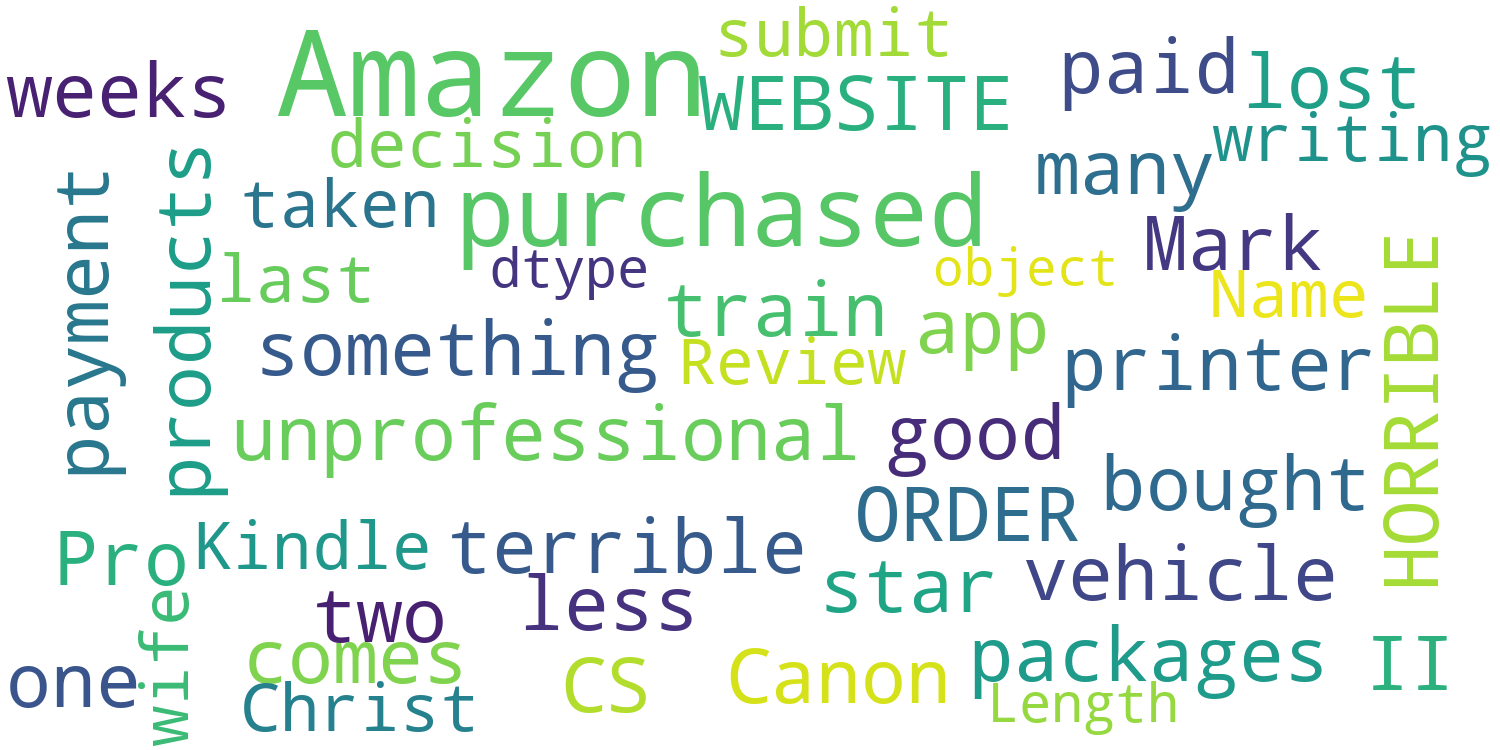

In [ ]:
# wordcloud function
def show_wordcloud(data, title = None):
    wordcloud_obj = WordCloud(
        background_color = 'white',
        height=250,width=500,
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42)
    
    img = wordcloud_obj.generate(str(data)).to_image()
    return img
    
# print wordcloud
show_wordcloud(df["Review"])

The most positive reviews indeed correspond to some good feedbacks.

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

,Review,pos
135,Contacted credit card company to resolve.,0.565
2791,I love shopping on Amazon. Great site and love...,0.564
2035,Amazon restored my privileges today and I am v...,0.553
3029,Shopping at Amazon is a wonderful convenience ...,0.536
2935,Amazon always has excellent customer service. ...,0.525
3866,The best overall place to purchase just about ...,0.521
2758,I love AmazonSmile. I get to donate to my favo...,0.520
3091,Amazon has everything I'm looking for & for go...,0.512
1705,I would like to thank the excellent customer s...,0.505
5760,Amazon finally resolved my issue and restored ...,0.492


Some errors can be found among the most negative reviews: Vader sometimes interpret 'no' or 'nothing' as negative words whereas they are sometimes used to say that there were no problems. Fortunately, most of the reviews are indeed bad ones.

In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review", "neg"]].head(10)

,Review,neg
6061,Horrible selling experience & fund problems. H...,0.517
2374,Amazon Delivery boys are very unprofessional. ...,0.380
3985,I ordered this item (Bosch GSB 501 500-Watt Pr...,0.365
0,In two weeks they lost 2 of the same packages....,0.355
5606,Low cost bags. Refused to abide by sale of goo...,0.352
305,Amazon is completely cheating customers and ba...,0.347
4734,I have been a faithful customer to Amazon for ...,0.340
1094,I had been Amazon's customer for many years. U...,0.337
1215,I don't know why Amazon hides the price until ...,0.329
5506,Very bad experience. I got empty box of hard d...,0.327


In [ ]:
df.head(2)

,Review,Is_bad_review,Review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,word_20,word_21,word_22,word_23,word_24,word_25,word_26,word_27,word_28,word_29,word_30,word_31,word_32,word_33,word_34,word_35,word_36,word_37,word_38,word_39,word_40,word_41,word_42,word_43,word_44,word_45,word_46,word_47,word_48,word_49,word_50,word_51,word_52,word_53,word_54,word_55,word_56,word_57,word_58,word_59,word_60,word_61,word_62,word_63,word_64,word_65,word_66,word_67,word_68,word_69,word_70,word_71,word_72,word_73,word_74,word_75,word_76,word_77,word_78,word_79,word_80,word_81,word_82,word_83,word_84,word_85,word_86,word_87,word_88,word_89,word_90,word_91,word_92,word_93,word_94,word_95,word_96,word_97,word_98,word_99,word_100,word_101,word_102,word_103,word_104,word_105,word_106,word_107,word_108,word_109,word_110,word_111,word_112,word_113,word_114,word_115,word_116,word_117,word_118,word_119,word_120,word_121,word_122,word_123,word_124,word_125,word_126,word_127,word_128,word_129,word_130,word_131,word_132,word_133,word_134,word_135,word_136,word_137,word_138,word_139,word_140,word_141,word_142,word_143,word_144,word_145,word_146,word_147,word_148,word_149,word_150,word_151,word_152,word_153,word_154,word_155,word_156,word_157,word_158,word_159,word_160,word_161,word_162,word_163,word_164,word_165,word_166,word_167,word_168,word_169,word_170,word_171,word_172,word_173,word_174,word_175,word_176,word_177,word_178,word_179,word_180,word_181,word_182,word_183,word_184,word_185,word_186,word_187,word_188,word_189,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,word_200,word_201,word_202,word_203,word_204,word_205,word_206,word_207,word_208,word_209,word_210,word_211,word_212,word_213,word_214,word_215,word_216,word_217,word_218,word_219,word_220,word_221,word_222,word_223,word_224,word_225,word_226,word_227,word_228,word_229,word_230,word_231,word_232,word_233,word_234,word_235,word_236,...,word_751,word_752,word_753,word_754,word_755,word_756,word_757,word_758,word_759,word_760,word_761,word_762,word_763,word_764,word_765,word_766,word_767,word_768,word_769,word_770,word_771,word_772,word_773,word_774,word_775,word_776,word_777,word_778,word_779,word_780,word_781,word_782,word_783,word_784,word_785,word_786,word_787,word_788,word_789,word_790,word_791,word_792,word_793,word_794,word_795,word_796,word_797,word_798,word_799,word_800,word_801,word_802,word_803,word_804,word_805,word_806,word_807,word_808,word_809,word_810,word_811,word_812,word_813,word_814,word_815,word_816,word_817,word_818,word_819,word_820,word_821,word_822,word_823,word_824,word_825,word_826,word_827,word_828,word_829,word_830,word_831,word_832,word_833,word_834,word_835,word_836,word_837,word_838,word_839,word_840,word_841,word_842,word_843,word_844,word_845,word_846,word_847,word_848,word_849,word_850,word_851,word_852,word_853,word_854,word_855,word_856,word_857,word_858,word_859,word_860,word_861,word_862,word_863,word_864,word_865,word_866,word_867,word_868,word_869,word_870,word_871,word_872,word_873,word_874,word_875,word_876,word_877,word_878,word_879,word_880,word_881,word_882,word_883,word_884,word_885,word_886,word_887,word_888,word_889,word_890,word_891,word_892,word_893,word_894,word_895,word_896,word_897,word_898,word_899,word_900,word_901,word_902,word_903,word_904,word_905,word_906,word_907,word_908,word_909,word_910,word_911,word_912,word_913,word_914,word_915,word_916,word_917,word_918,word_919,word_920,word_921,word_922,word_923,word_924,word_925,word_926,word_927,word_928,word_929,word_930,word_931,word_932,word_933,word_934,word_935,word_936,word_937,word_938,word_939,word_940,word_941,word_942,word_943,word_944,word_945,word_946,word_947,word_948,word_949,word_950,word_951,word_952,wor

The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that good reviews are for most of them considered as very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores.

This shows us that previously computed sentiment features will be very important in our modelling part.

# **7. Unseen data**

In [ ]:
df_seen = df.sample(frac=0.8,random_state=12)  
df_unseen = df.drop(df_seen.index).reset_index(drop=True) 
df_seen.reset_index(drop=True,inplace=True)
print(df_unseen.shape)
print(df_seen.shape)


(1280, 2014)
(5121, 2014)


# **A Pycaret**

## **pycaret Preprocessing and Dimentionality Reduction**

---



## **A 1 Pycaret Pre-processing**

In [ ]:
df_seen = df_seen.drop(['Review','Review_clean'],axis=1)

### **preprocess pipeline**

In [ ]:
df_seen.head(4)

,Is_bad_review,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,word_20,word_21,word_22,word_23,word_24,word_25,word_26,word_27,word_28,word_29,word_30,word_31,word_32,word_33,word_34,word_35,word_36,word_37,word_38,word_39,word_40,word_41,word_42,word_43,word_44,word_45,word_46,word_47,word_48,word_49,word_50,word_51,word_52,word_53,word_54,word_55,word_56,word_57,word_58,word_59,word_60,word_61,word_62,word_63,word_64,word_65,word_66,word_67,word_68,word_69,word_70,word_71,word_72,word_73,word_74,word_75,word_76,word_77,word_78,word_79,word_80,word_81,word_82,word_83,word_84,word_85,word_86,word_87,word_88,word_89,word_90,word_91,word_92,word_93,word_94,word_95,word_96,word_97,word_98,word_99,word_100,word_101,word_102,word_103,word_104,word_105,word_106,word_107,word_108,word_109,word_110,word_111,word_112,word_113,word_114,word_115,word_116,word_117,word_118,word_119,word_120,word_121,word_122,word_123,word_124,word_125,word_126,word_127,word_128,word_129,word_130,word_131,word_132,word_133,word_134,word_135,word_136,word_137,word_138,word_139,word_140,word_141,word_142,word_143,word_144,word_145,word_146,word_147,word_148,word_149,word_150,word_151,word_152,word_153,word_154,word_155,word_156,word_157,word_158,word_159,word_160,word_161,word_162,word_163,word_164,word_165,word_166,word_167,word_168,word_169,word_170,word_171,word_172,word_173,word_174,word_175,word_176,word_177,word_178,word_179,word_180,word_181,word_182,word_183,word_184,word_185,word_186,word_187,word_188,word_189,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,word_200,word_201,word_202,word_203,word_204,word_205,word_206,word_207,word_208,word_209,word_210,word_211,word_212,word_213,word_214,word_215,word_216,word_217,word_218,word_219,word_220,word_221,word_222,word_223,word_224,word_225,word_226,word_227,word_228,word_229,word_230,word_231,word_232,word_233,word_234,word_235,word_236,word_237,word_238,...,word_1751,word_1752,word_1753,word_1754,word_1755,word_1756,word_1757,word_1758,word_1759,word_1760,word_1761,word_1762,word_1763,word_1764,word_1765,word_1766,word_1767,word_1768,word_1769,word_1770,word_1771,word_1772,word_1773,word_1774,word_1775,word_1776,word_1777,word_1778,word_1779,word_1780,word_1781,word_1782,word_1783,word_1784,word_1785,word_1786,word_1787,word_1788,word_1789,word_1790,word_1791,word_1792,word_1793,word_1794,word_1795,word_1796,word_1797,word_1798,word_1799,word_1800,word_1801,word_1802,word_1803,word_1804,word_1805,word_1806,word_1807,word_1808,word_1809,word_1810,word_1811,word_1812,word_1813,word_1814,word_1815,word_1816,word_1817,word_1818,word_1819,word_1820,word_1821,word_1822,word_1823,word_1824,word_1825,word_1826,word_1827,word_1828,word_1829,word_1830,word_1831,word_1832,word_1833,word_1834,word_1835,word_1836,word_1837,word_1838,word_1839,word_1840,word_1841,word_1842,word_1843,word_1844,word_1845,word_1846,word_1847,word_1848,word_1849,word_1850,word_1851,word_1852,word_1853,word_1854,word_1855,word_1856,word_1857,word_1858,word_1859,word_1860,word_1861,word_1862,word_1863,word_1864,word_1865,word_1866,word_1867,word_1868,word_1869,word_1870,word_1871,word_1872,word_1873,word_1874,word_1875,word_1876,word_1877,word_1878,word_1879,word_1880,word_1881,word_1882,word_1883,word_1884,word_1885,word_1886,word_1887,word_1888,word_1889,word_1890,word_1891,word_1892,word_1893,word_1894,word_1895,word_1896,word_1897,word_1898,word_1899,word_1900,word_1901,word_1902,word_1903,word_1904,word_1905,word_1906,word_1907,word_1908,word_1909,word_1910,word_1911,word_1912,word_1913,word_1914,word_1915,word_1916,word_1917,word_1918,word_1919,word_1920,word_1921,word_1922,word_1923,word_1924,word_1925,word_1926,word_1927,word_1928,word_1929,word_1930,word_1931,word_1932,wor

In [ ]:
preprocessed_data =setup(data = df_seen,target = 'Is_bad_review',session_id=12,train_size=0.8,                     
                         normalize=True,transformation=True,
                         remove_multicollinearity=True,
                         remove_outliers=True,
                         multicollinearity_threshold=0.3,
                         combine_rare_levels=True, 
                         feature_selection=True,
                         feature_selection_threshold=0.97,  
                        #  feature_interaction=True,
                         ignore_low_variance=True,
                         data_split_stratify=True,
                         use_gpu=True,
                         silent=True,
                         experiment_name='employee_experiment_1')

,Description,Value
0,session_id,12
1,Target,Is_bad_review
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5121, 2012)"
5,Missing Values,False
6,Numeric Features,2011
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## **A 3 Model creation**

In [215]:
# these metrics are not needed for evaluation

# remove_metric("Kappa")
# remove_metric("MCC")

In [216]:
# we compare every model to find which is good 

# compare_models(exclude=["catboost",'qda'],sort="F1")

In [217]:
# creating the model qda

clf_qda = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1
0,0.8667,0.8859,0.9417,0.8561,0.8968
1,0.8252,0.8500,0.9417,0.8071,0.8692
2,0.8689,0.8969,0.9623,0.8456,0.9002
3,0.8380,0.8807,0.9205,0.8333,0.8748
4,0.8792,0.9271,0.9456,0.8692,0.9058
5,0.8792,0.9252,0.9582,0.8609,0.9069
6,0.8740,0.9236,0.9791,0.8417,0.9052
7,0.8792,0.9105,0.9582,0.8609,0.9069
8,0.8586,0.8710,0.9498,0.8407,0.8919
9,0.8663,0.9051,0.9623,0.8425,0.8984


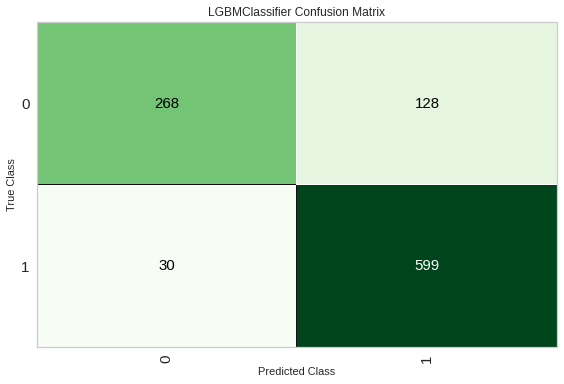

In [218]:
# confustion matrix of classifier qda

plot_model(clf_qda,plot="confusion_matrix")

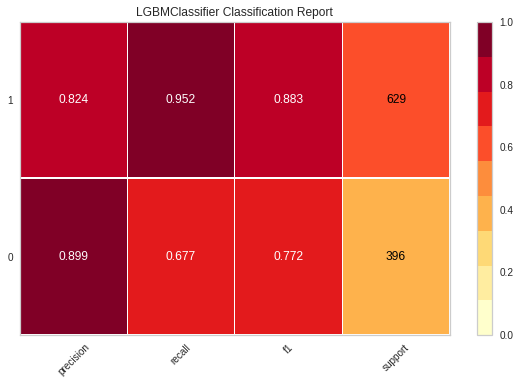

In [219]:
# classs report 

plot_model(clf_qda,plot="class_report")

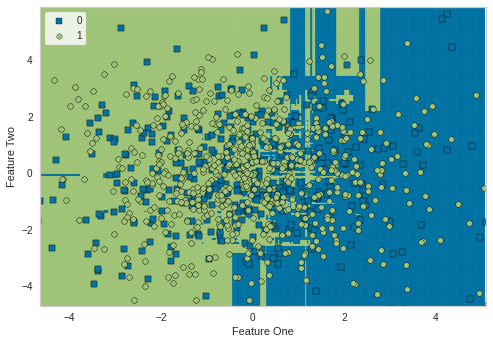

In [220]:
# boundary

plot_model(clf_qda,"boundary")

In [221]:
# finalise the model 

final_model = finalize_model(clf_qda)

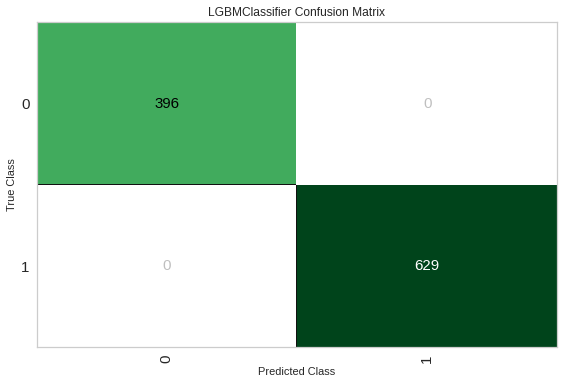

In [222]:
# confustion matrix of final qda

plot_model(final_model,plot="confusion_matrix")

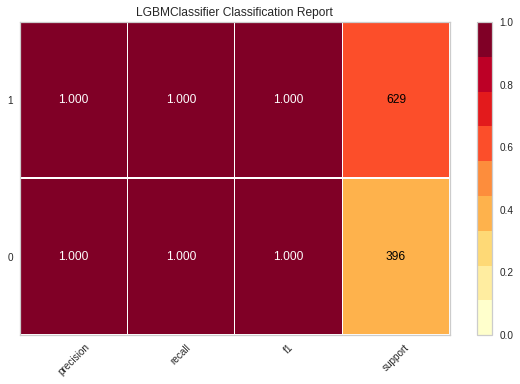

In [223]:
# classs report 

plot_model(final_model,plot="class_report")

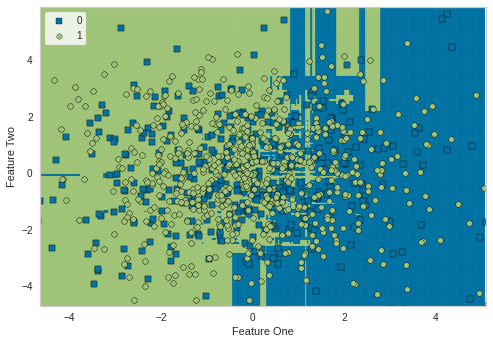

In [224]:
# boundary

plot_model(final_model,"boundary")

## **A 4 Testing**

In [225]:
# Prediction on unseen data 

unseen_df_predcit = predict_model(final_model,df_unseen)

In [226]:
# confusion matrix 

confusion_matrix(unseen_df_predcit['Is_bad_review'],unseen_df_predcit['Label'])

array([[338, 129],
       [ 48, 765]])

In [227]:
# value counts of 1 and 0 in unseen data

unseen_df_predcit['Is_bad_review'].value_counts()

1    813
0    467
Name: Is_bad_review, dtype: int64

In [228]:
# value counts of 1 and 0 in predicted


unseen_df_predcit['Label'].value_counts()

1    894
0    386
Name: Label, dtype: int64

In [229]:
# precsion 

lr_precision, lr_recall, _ = precision_recall_curve(unseen_df_predcit['Is_bad_review'],unseen_df_predcit['Label'])

print(lr_precision)
print(lr_recall)

[0.63515625 0.8557047  1.        ]
[1.         0.94095941 0.        ]


In [230]:
# F1 score of the predcition

f1_score(df_unseen['Is_bad_review'],unseen_df_predcit['Label'])

0.8963093145869948

In [ ]:
for i in range(unseen_df_predcit.shape[0]):
  if unseen_df_predcit['Is_bad_review'][i] != unseen_df_predcit['Label'][i]:
    print(unseen_df_predcit.loc[i,['Review','Label','Is_bad_review']]
)

In [245]:
unseen_df_predcit.loc[:,['Review','Label','Is_bad_review']][:50]

,Review,Label,Is_bad_review
0,Amazon is terrible when it comes to something ...,1,1
1,"I recently moved into an area of quadplexes, e...",1,1
2,They either never deliver my orders on time or...,1,1
3,Amazon use to be great. Now the price went up ...,1,1
4,After calling and being told of my package bei...,1,0
5,Ordered my first Rx from Amazon Pharmacy and n...,1,0
6,Like many shoppers on Amazon I rely on others ...,1,1
7,I have had an Amazon account for quite some ti...,1,1
8,I gave a $200 Gift Card to my sister for Chris...,1,1
9,"Purchased item which, as per email received fr...",1,1
